In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize, rosen, rosen_der

In [81]:
SMALL_SIZE = 10
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

In [74]:
def f(Y, t, σ, α, n, ρ):
    k, c = Y
    cdot = c*σ*(α*k**(α-1)-ρ-n)
    kdot = k**α-c-n*k
    return([kdot, cdot])

In [49]:
def saddle(y,T,N,kinit,σ,α,n,ρ,kstar,cstar): 
    tspan = np.linspace(0, T, N) 
    y0 = [kinit, y[0]] 
    ys = odeint(f,y0,tspan,args=(σ,α,n,ρ)) 
    L = (np.array([ys[-1,0]])-kstar)**2 + (np.array([ys[-1,1]])-cstar)**2
    return(L)

In [65]:
def DashLine(kinit, kstar, cstar, yin, parameters, color, fig_n):
    σ, α, n, ρ = parameters
    T, N = 50, 1000
    res = minimize(saddle,yin,
                   args=(T,N,kinit,σ,α,n,ρ,kstar,cstar),
                   method="Nelder-Mead",
                   options={'disp': False,'maxiter':100}) # 'gtol': 1e-12, 
    k0 = [kinit, res.x] 
    tspan = np.linspace(0, T, N) 
    ys = odeint(f,k0,tspan,args=(σ,α,n,ρ)) 
    axes[fig_n].plot(ys[:,0], ys[:,1], color+'--') # path 

In [101]:
def ramsey(parameters, limits, color, fig_n, labeltext):
    σ, α, n, ρ = parameters
    kmin, kmax, cmin, cmax, T, N = limits
    
    k = np.linspace(kmin, kmax, N)
    c = np.linspace(cmin, cmax, N)
    K, C = np.meshgrid(k, c)
    
    kstar = ((ρ+n)/α)**(-1/(1-α))
    cstar = kstar**α - n*kstar
    c_kdot_0 = K[0,:]**α - n*K[0,:]
    
    t = 0
    
    #plt.figure(figsize=(12,8)) 
    # plot null lines 
    axes[fig_n].plot([kstar,kstar],[cmin,cmax], color, label=labeltext) 
    axes[fig_n].plot(K[0,:],c_kdot_0, color)
    DashLine(7, kstar, cstar, np.array([1.1]), parameters, color, fig_n)
    DashLine(0.5, kstar, cstar, np.array([0.3]), parameters, color, fig_n)
    axes[fig_n].set_xlabel('$k$') 
    axes[fig_n].set_ylabel('$c$') 
    axes[fig_n].set_xlim([kmin, kmax]) 
    axes[fig_n].set_ylim([cmin, cmax])

In [102]:
# paramaters 
parameters_0 = [1, 0.3, 0.12, 0.04] # = [σ, α, n, ρ]
# limits 
limits_0 =[0, 22, 0, 2, 50, 1000] # = [kmin, kmax, cmin, cmax, T, N]

<br>

# $n$

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


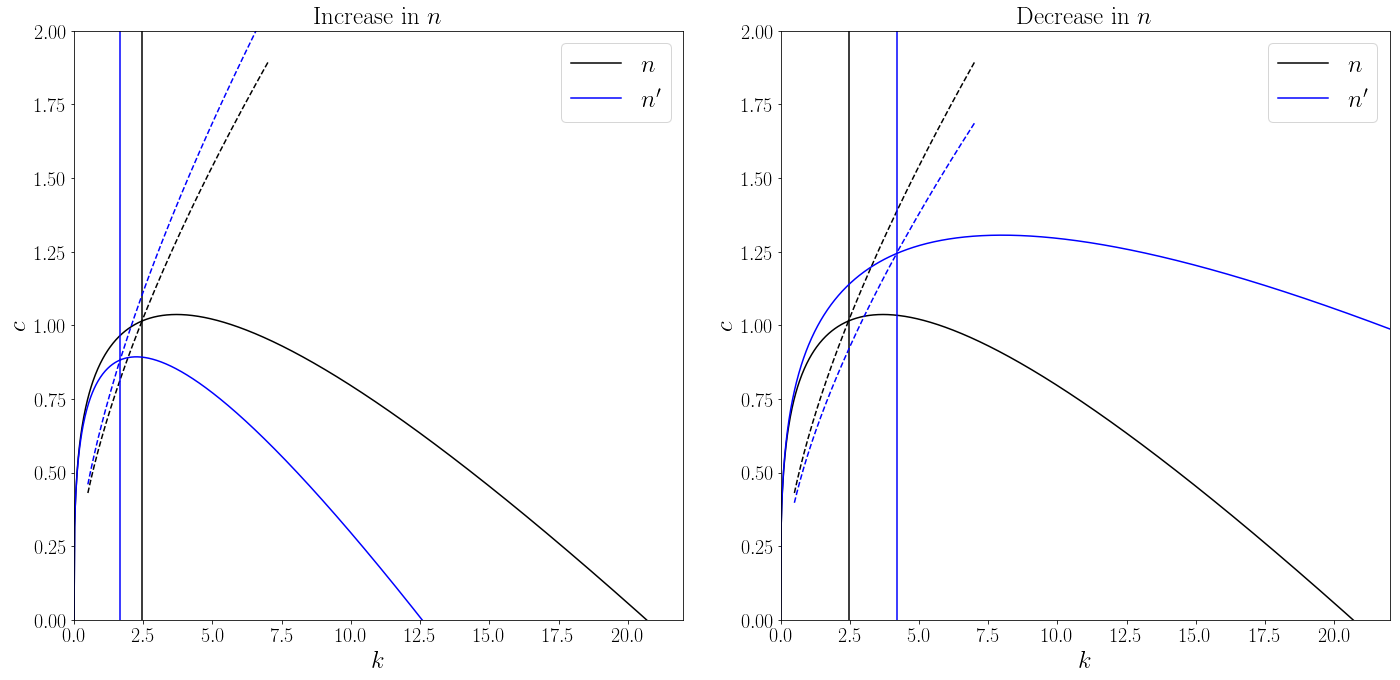

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()

ramsey(parameters_0, limits_0, "k", 0, r"$n$")
ramsey([1, 0.3, 0.17, 0.04], limits_0, "b", 0, r"$n'$")
axes[0].set_title(r"Increase in $n$", fontsize=25)
axes[0].legend()

ramsey(parameters_0, limits_0, "k", 1, r"$n$")
ramsey([1, 0.3, 0.07, 0.04], limits_0, "b", 1, r"$n'$")
axes[1].set_title(r"Decrease in $n$", fontsize=25)
axes[1].legend()

plt.tight_layout()

<br>

# $\rho$

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


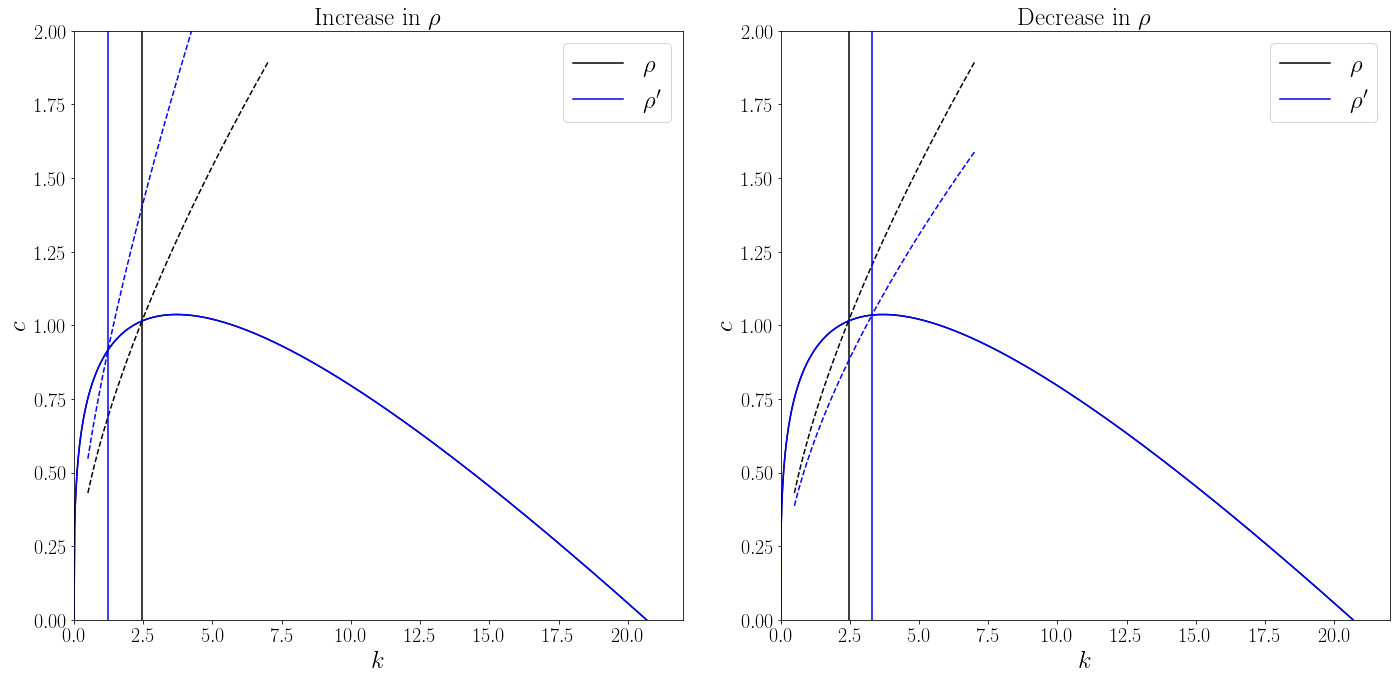

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()

ramsey(parameters_0, limits_0, "k", 0, r"$\rho$")
ramsey([1, 0.3, 0.12, 0.14], limits_0, "b", 0, r"$\rho'$")
axes[0].set_title(r"Increase in $\rho$", fontsize=25)
axes[0].legend()

ramsey(parameters_0, limits_0, "k", 1, r"$\rho$")
ramsey([1, 0.3, 0.12, 0.01], limits_0, "b", 1, r"$\rho'$")
axes[1].set_title(r"Decrease in $\rho$", fontsize=25)
axes[1].legend()

plt.tight_layout()

<br>

# $\sigma$

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


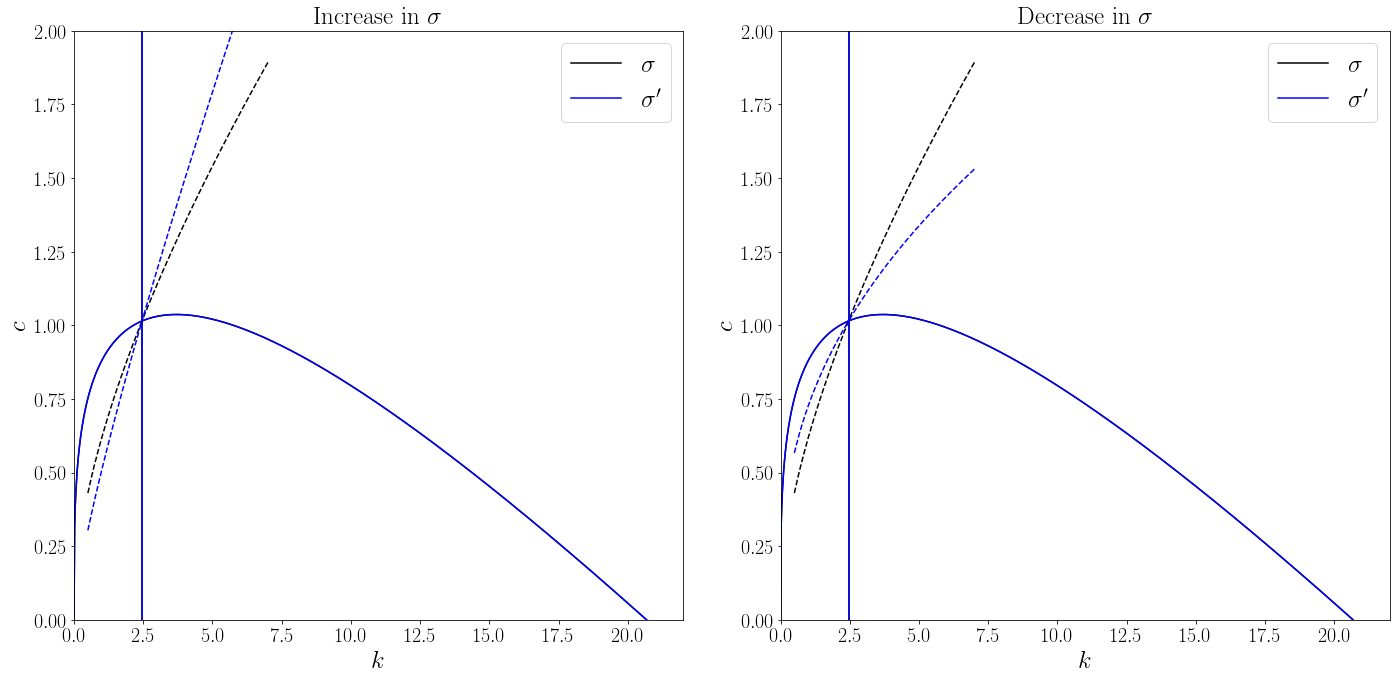

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)); axes = axes.flatten()

ramsey(parameters_0, limits_0, "k", 0, r"$\sigma$")
ramsey([2, 0.3, 0.12, 0.04], limits_0, "b", 0, r"$\sigma'$")
axes[0].set_title(r"Increase in $\sigma$", fontsize=25)
axes[0].legend()

ramsey(parameters_0, limits_0, "k", 1, r"$\sigma$")
ramsey([0.4, 0.3, 0.12, 0.04], limits_0, "b", 1, r"$\sigma'$")
axes[1].set_title(r"Decrease in $\sigma$", fontsize=25)
axes[1].legend()

plt.tight_layout()